In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# History

In [32]:
def plot_columns(df, columns, ylim=None, logaxis=False, hline=True):
    # Check if 'Iteration' is a column in the DataFrame
    if 'Iteration' not in df.columns:
        raise ValueError("The DataFrame does not contain an 'Iteration' column.")
    
    # Check if all columns in the list are present in the DataFrame
    for column in columns:
        if column not in df.columns:
            raise ValueError(f"The DataFrame does not contain the column: {column}")
    
    # Plotting each specified column against the 'Iteration' column
    plt.figure(figsize=(20, 6))
    for column in columns:
        plt.plot(df['Iteration'], df[column], label=column)

    # Setting the y-axis limits if specified
    if ylim is not None:
        plt.ylim(ylim)

    # Setting the y-axis to a logarithmic scale if specified
    if logaxis:
        plt.yscale('log')
    
    # Plot a horizontal line at y=0
    if hline:
        plt.axhline(0, color='black', lw=0.5)

    plt.xlabel('Iteration')
    plt.ylabel('Value')
    plt.title('Plot of Columns over Iterations')
    plt.legend()
    plt.grid(True)
    plt.show()

In [33]:
history = 'logs/log.csv'
history = pd.read_csv(history)

history.head()

,Elapsed Time,Iteration,D/loss_real,D/loss_fake,D/loss_gp,D/loss_cls,D/loss_dom,G/loss_fake,G/loss_rec,G/loss_cls,G/loss_dom,G/loss_rot
0,0:00:14,100,-9.0499,1.4305,1.3486,0.1606,2.6932,-1.6552,0.3259,1.3494,2.7081,0.2537
1,0:00:24,200,-7.0211,-0.5136,1.3734,0.0557,2.7292,1.0787,0.1644,1.3742,2.7362,0.1759
2,0:00:35,300,-8.2819,0.0150,1.4250,0.1531,2.6949,-0.8322,0.1357,1.3992,2.7030,0.1544
3,0:00:45,400,-4.6328,-1.5927,1.4524,0.0703,2.7273,1.5215,0.1301,1.4269,2.7190,0.1469
4,0:00:56,500,-3.1827,-1.5115,1.3328,0.0166,2.7088,1.6123,0.1044,1.3321,2.7000,0.1224


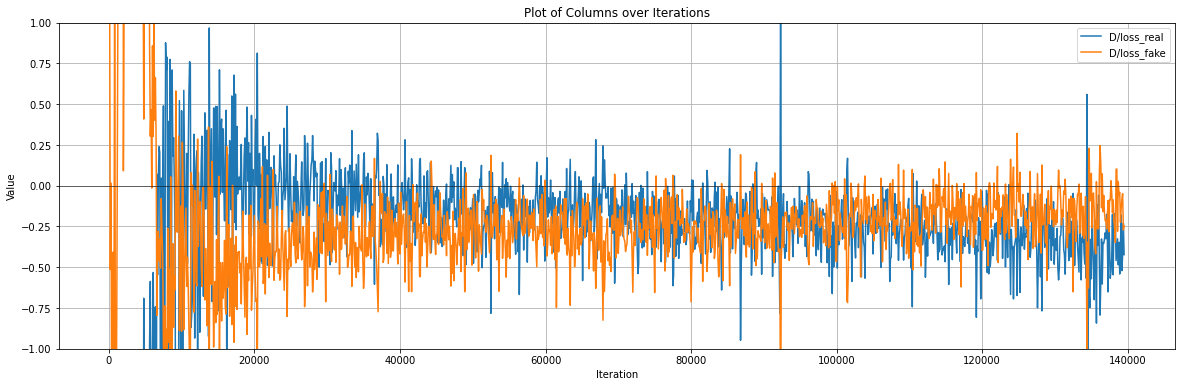

In [34]:
plot_columns(history, ['D/loss_real', 'D/loss_fake'], logaxis=False, ylim=(-1, 1))

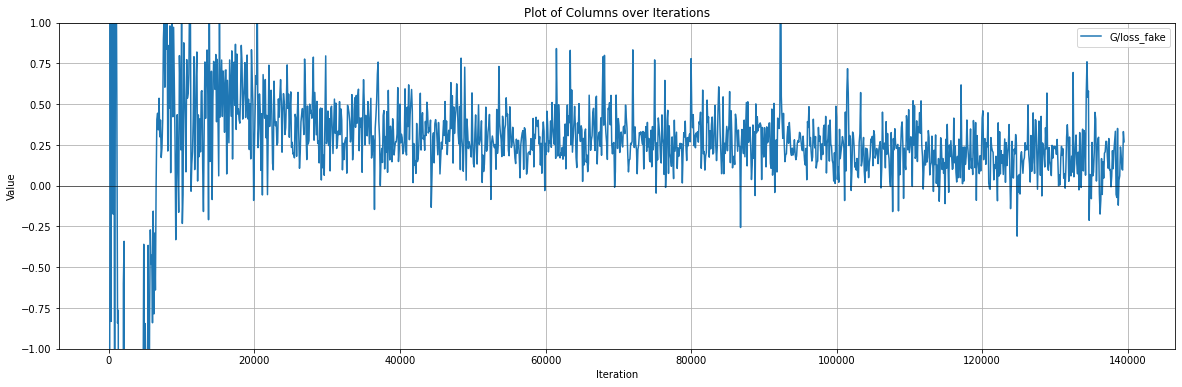

In [35]:
plot_columns(history, ['G/loss_fake'], logaxis=False, ylim=(-1, 1))

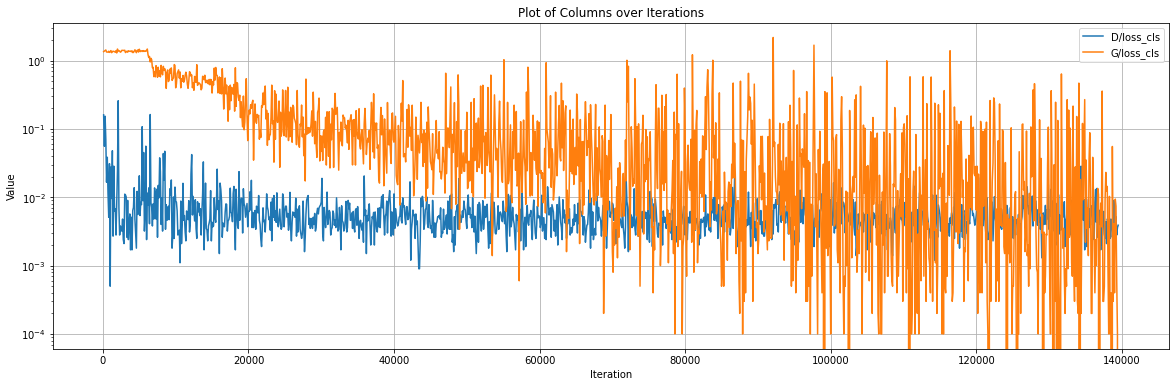

In [36]:
plot_columns(history, ['D/loss_cls', 'G/loss_cls'], logaxis=True)

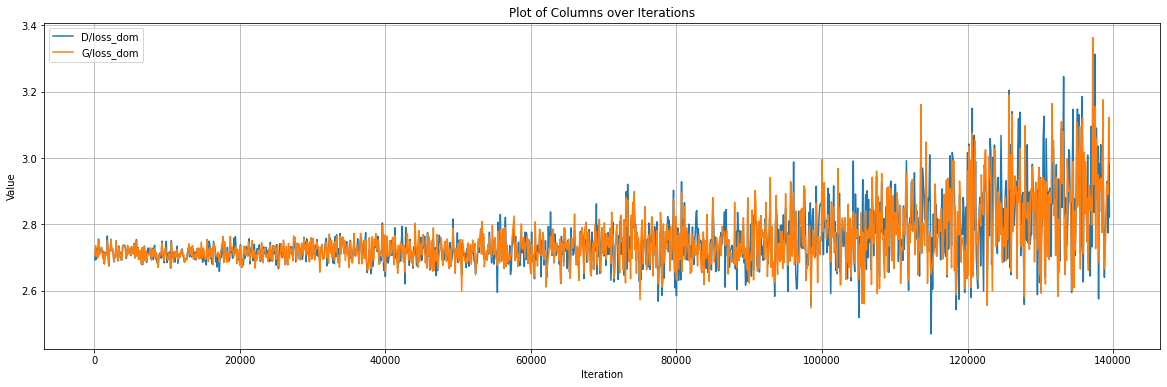

In [37]:
plot_columns(history, ['D/loss_dom', 'G/loss_dom'], logaxis=False, hline=False)

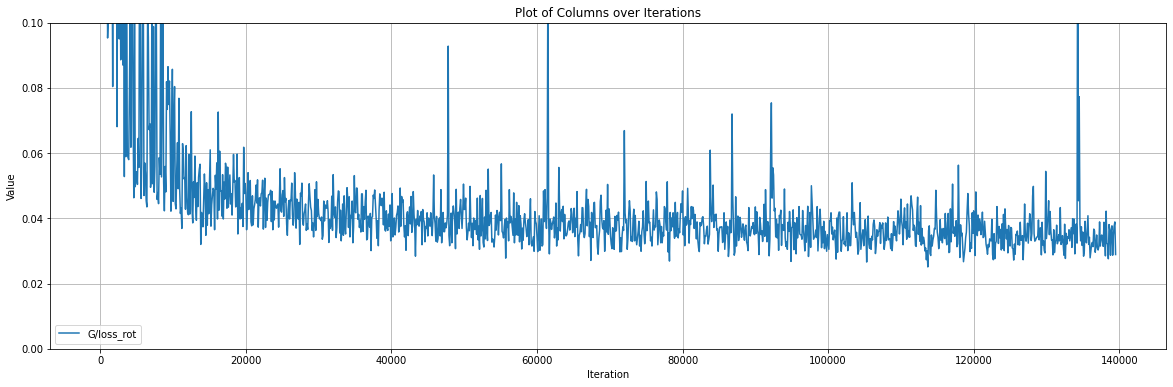

In [38]:
plot_columns(history, ['G/loss_rot'], logaxis=False, hline=False, ylim=(0, 0.1))

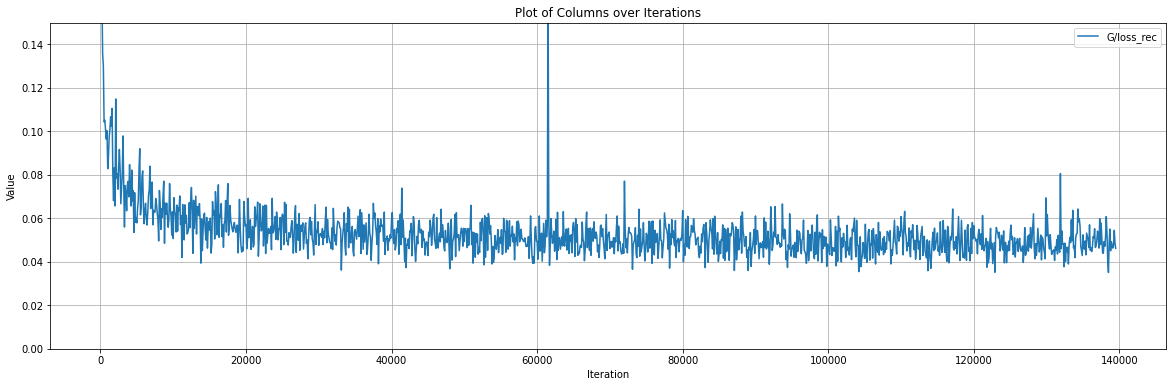

In [39]:
plot_columns(history, ['G/loss_rec'], logaxis=False, ylim=(0, 0.15))

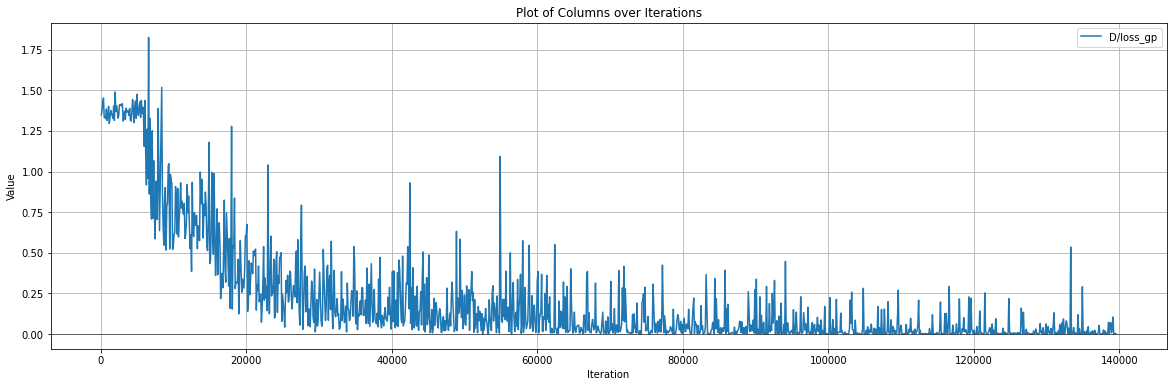

In [40]:
plot_columns(history, ['D/loss_gp'], logaxis=False)

# Metrics

## TSTR Score

In [41]:
file_path = 'results/TSTR_scores.csv'
classification_scores = pd.read_csv(file_path)
classification_scores.head()

,step,source,domain,accuracy,loss,f1
0,10000,WAL,15,0.560000,2.278547,0.475152
1,10000,WAL,16,0.333333,2.996466,0.240741
2,10000,WAL,17,0.377358,1.795199,0.303465
3,10000,WAL,18,0.722222,3.003798,0.651979
4,10000,WAL,19,0.611111,0.909669,0.581324


Maximum average accuracy: 0.7655 at step 100000


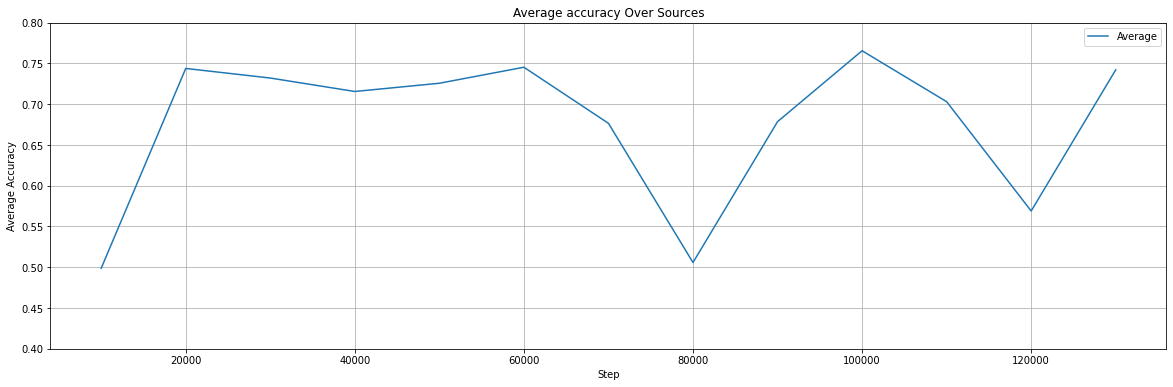

Maximum average f1: 0.7306 at step 100000


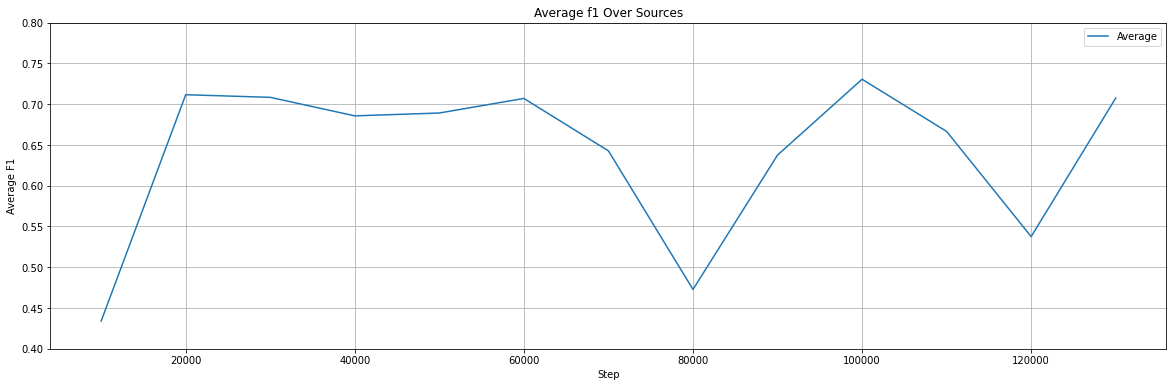

Minimum average loss: 1.0346 at step 100000


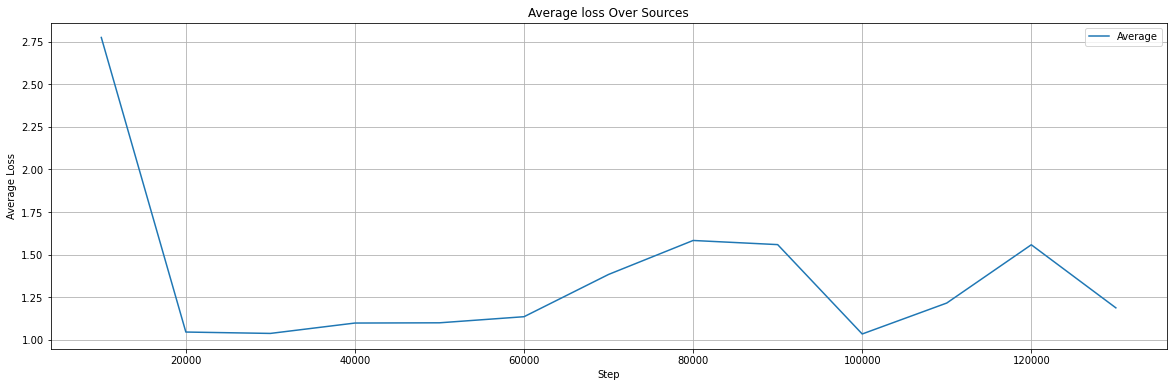

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_average_metric_over_sources(metrics, metric, ylim=None):
    # Filter the DataFrame based on the metric
    filtered_data = metrics

    # Group by 'step' and then calculate the mean across 'source' and 'domain'
    mean_data = filtered_data.groupby(['step']).agg({metric: 'mean'}).reset_index()

    # Plotting
    plt.figure(figsize=(20, 6))
    plt.plot(mean_data['step'], mean_data[metric], label='Average')
    
    # Setting the y-axis limits if specified
    if ylim is not None:
        plt.ylim(ylim)

    if metric == 'accuracy' or metric == 'f1':
        # Find the maximum value of the metric and its corresponding step
        max_value = mean_data[metric].max()
        max_step = mean_data[mean_data[metric] == max_value]['step'].values[0]
        print(f'Maximum average {metric}: {max_value:.4f} at step {max_step}')
    elif metric == 'loss':
        # Find the minimum value of the metric and its corresponding step
        min_value = mean_data[metric].min()
        min_step = mean_data[mean_data[metric] == min_value]['step'].values[0]
        print(f'Minimum average {metric}: {min_value:.4f} at step {min_step}')

    plt.title(f'Average {metric} Over Sources')
    plt.xlabel('Step')
    plt.ylabel(f'Average {metric.capitalize()}')
    plt.legend()
    plt.grid(True) 
    plt.show()

plot_average_metric_over_sources(classification_scores, 'accuracy', ylim=(0.4, 0.8))
plot_average_metric_over_sources(classification_scores, 'f1', ylim=(0.4, 0.8))
plot_average_metric_over_sources(classification_scores, 'loss')

## Domain Score

In [43]:
domain_scores = pd.read_csv('results/domain_scores.csv')
domain_scores.head()

,step,source,target,accuracy,loss
0,10000,WAL,RUN,0.034945,11.848320
1,10000,WAL,CLD,0.044382,11.398981
2,10000,WAL,CLU,0.053966,13.617155
3,20000,WAL,RUN,0.033618,11.740480
4,20000,WAL,CLD,0.095252,8.979575


Maximum accuracy for target RUN: 0.0407 at step 80000
Maximum accuracy for target CLD: 0.1135 at step 100000
Maximum accuracy for target CLU: 0.0873 at step 130000


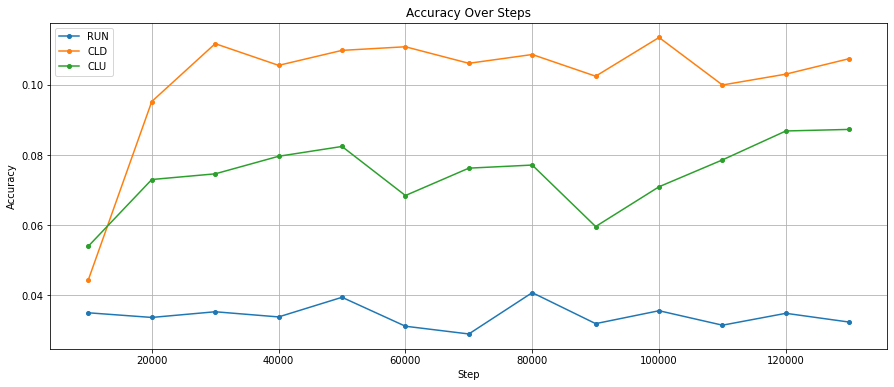

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def plot_metric(data, metric):
    plt.figure(figsize=(15, 6))
    for target in data['target'].unique():
        # Filter the DataFrame based on the target
        filtered_data = data[data['target'] == target]
        plt.plot(filtered_data['step'], filtered_data[metric], label=target, marker='o', markersize=4)

        # Find the maximum value of the metric and its corresponding step
        max_value = filtered_data[metric].max()
        max_step = filtered_data[filtered_data[metric] == max_value]['step'].values[0]
        print(f'Maximum {metric} for target {target}: {max_value:.4f} at step {max_step}')
    
    plt.title(f'{metric.capitalize()} Over Steps')
    plt.xlabel('Step')
    plt.ylabel(f'{metric.capitalize()}')
    plt.legend()
    plt.grid(True)
    plt.show()


plot_metric(domain_scores, 'accuracy')

Maximum accuracy: 0.0772 at step 50000


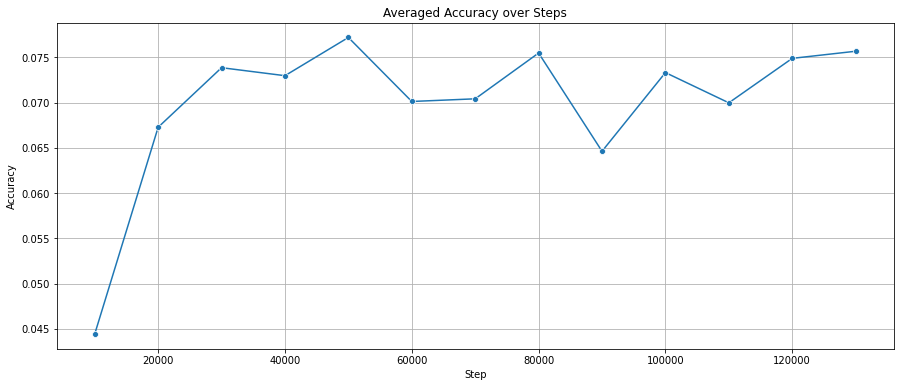

In [45]:
def plot_metric_averaged(data, metric):    
    # Group by step and calculate the mean of the metric
    averaged_data = data.groupby('step', as_index=False)[metric].mean()

    # Print the maximum value of the metric and its corresponding step
    max_value = averaged_data[metric].max()
    max_step = averaged_data[averaged_data[metric] == max_value]['step'].values[0]
    print(f'Maximum {metric}: {max_value:.4f} at step {max_step}')
    
    # Plotting the line plot
    plt.figure(figsize=(15, 6))
    sns.lineplot(data=averaged_data, x='step', y=metric, marker='o')
    plt.title(f"Averaged {metric.capitalize()} over Steps")
    plt.xlabel('Step')
    plt.ylabel(metric.capitalize())
    plt.grid(True)
    plt.show()


plot_metric_averaged(domain_scores, 'accuracy')